# LOAD DATA

In [258]:
import unicodecsv

def read_csv(filename):
    with open(filename, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)

enrollments = read_csv('C:/ProgramData/Anaconda3/Lib/site-packages/enrollments.csv')
daily_engagement = read_csv('C:/ProgramData/Anaconda3/Lib/site-packages/daily_engagement.csv')
project_submissions = read_csv('C:/ProgramData/Anaconda3/Lib/site-packages/project_submissions.csv')

In [259]:
print(enrollments[0])

OrderedDict([('account_key', '448'), ('status', 'canceled'), ('join_date', '2014-11-10'), ('cancel_date', '2015-01-14'), ('days_to_cancel', '65'), ('is_udacity', 'True'), ('is_canceled', 'True')])


In [260]:
print(daily_engagement[0])

OrderedDict([('acct', '0'), ('utc_date', '2015-01-09'), ('num_courses_visited', '1.0'), ('total_minutes_visited', '11.6793745'), ('lessons_completed', '0.0'), ('projects_completed', '0.0')])


In [261]:
print(project_submissions[0])

OrderedDict([('creation_date', '2015-01-14'), ('completion_date', '2015-01-16'), ('assigned_rating', 'UNGRADED'), ('account_key', '256'), ('lesson_key', '3176718735'), ('processing_state', 'EVALUATED')])


# Fixing key name in the daily_engagement

In [262]:
for data in daily_engagement:
    data['account_key']=data['acct']
    del[data['acct']]
    #print(data)

# Fixing the Data Types

In [263]:
from datetime import datetime as dt

# Takes a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

# Clean up the data types in the enrollments table
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
enrollments[0]

OrderedDict([('account_key', '448'),
             ('status', 'canceled'),
             ('join_date', datetime.datetime(2014, 11, 10, 0, 0)),
             ('cancel_date', datetime.datetime(2015, 1, 14, 0, 0)),
             ('days_to_cancel', 65),
             ('is_udacity', True),
             ('is_canceled', True)])

In [264]:
# Clean up the data types in the engagement table
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
daily_engagement[0]

OrderedDict([('utc_date', datetime.datetime(2015, 1, 9, 0, 0)),
             ('num_courses_visited', 1),
             ('total_minutes_visited', 11.6793745),
             ('lessons_completed', 0),
             ('projects_completed', 0),
             ('account_key', '0')])

In [265]:
# Clean up the data types in the submissions table
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

project_submissions[0]

OrderedDict([('creation_date', datetime.datetime(2015, 1, 14, 0, 0)),
             ('completion_date', datetime.datetime(2015, 1, 16, 0, 0)),
             ('assigned_rating', 'UNGRADED'),
             ('account_key', '256'),
             ('lesson_key', '3176718735'),
             ('processing_state', 'EVALUATED')])

# Investigating the Data

In [266]:
#####################################
#                 2                 #
#####################################

## Find the total number of rows and the number of unique students (account keys)
## in each table.


def get_unique_students(dataset):
    #set doesn't allow duplicate values hence easier
    unique_students = set()
    for data in dataset:
        unique_students.add(data['account_key'])
    return unique_students

#Number of enrollments
print("Number of enrollments : "+str(len(enrollments)))

unique_enrollment_students=get_unique_students(enrollments)
print("Number of unique students : "+str(len(unique_enrollment_students)))

Number of enrollments : 1640
Number of unique students : 1302


In [267]:
print("Number of rows in daily_engagement : "+str(len(daily_engagement)))

unique_engagement_students=get_unique_students(daily_engagement)
print("Number of unique engagement students : "+str(len(unique_engagement_students)))

Number of rows in daily_engagement : 136240
Number of unique engagement students : 1237


In [268]:
print("Number of rows in project_submissions : "+str(len(project_submissions)))
#print(project_submissions)
unique_submission_students=get_unique_students(project_submissions)
print("Number of unique submission students : "+str(len(unique_submission_students)))


Number of rows in project_submissions : 3642
Number of unique submission students : 743


# Missing engagement Records

In [269]:
#Printing out one of the missing records in daily_engagement
for account in unique_enrollment_students:
    if account not in unique_engagement_students:
        missing_account=account
        #print(missing_account)
        break;
    
for data in enrollments:
    if data['account_key']==missing_account:
        print(data)
        break;

OrderedDict([('account_key', '1273'), ('status', 'canceled'), ('join_date', datetime.datetime(2015, 1, 12, 0, 0)), ('cancel_date', datetime.datetime(2015, 1, 12, 0, 0)), ('days_to_cancel', 0), ('is_udacity', False), ('is_canceled', True)])


In [270]:
surprising_records=0
for data in enrollments:
    if data['account_key'] not in unique_engagement_students and (data['join_date']!=data['cancel_date']):
        surprising_records=surprising_records+1
        print(data)
        
print(surprising_records)
        

OrderedDict([('account_key', '1304'), ('status', 'canceled'), ('join_date', datetime.datetime(2015, 1, 10, 0, 0)), ('cancel_date', datetime.datetime(2015, 3, 10, 0, 0)), ('days_to_cancel', 59), ('is_udacity', True), ('is_canceled', True)])
OrderedDict([('account_key', '1304'), ('status', 'canceled'), ('join_date', datetime.datetime(2015, 3, 10, 0, 0)), ('cancel_date', datetime.datetime(2015, 6, 17, 0, 0)), ('days_to_cancel', 99), ('is_udacity', True), ('is_canceled', True)])
OrderedDict([('account_key', '1101'), ('status', 'current'), ('join_date', datetime.datetime(2015, 2, 25, 0, 0)), ('cancel_date', None), ('days_to_cancel', None), ('is_udacity', True), ('is_canceled', False)])
3


# Removing Test Accounts 

In [271]:
# Create a set of the account keys for all Udacity test accounts
udacity_test_accounts = set()
for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_accounts.add(enrollment['account_key'])
len(udacity_test_accounts)

6

In [272]:
# Given some data with an account_key field, removes any records corresponding to Udacity test accounts
def remove_udacity_accounts(data):
    non_udacity_data = []
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data

In [273]:
# Remove Udacity test accounts from all three tables
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print(len(non_udacity_enrollments))
print(len(non_udacity_engagement))
print(len(non_udacity_submissions))

1622
135656
3634


# Redefining the Question

In [274]:
#####################################
#                 6                 #
#####################################

## Create a dictionary named paid_students containing all students who either
## haven't canceled yet or who remained enrolled for more than 7 days. The keys
## should be account keys, and the values should be the date the student enrolled.

paid_students = {}
for enrollment in non_udacity_enrollments:
    if (not enrollment['is_canceled'] or enrollment['days_to_cancel'] > 7):
        account_key = enrollment['account_key']
        enrollment_date = enrollment['join_date']
        if (account_key not in paid_students or enrollment_date > paid_students[account_key]):
            paid_students[account_key] = enrollment_date
len(paid_students)

995

# Getting data from first week

In [275]:
#####################################
#                 7                 #
#####################################

## Create a list of rows from the engagement table including only rows where
## the student is one of the paid students you just found, and the date is within
## one week of the student's join date.

# def within_one_week(join_date, engagement_date):
#     time_delta = engagement_date - join_date
#     return time_delta.days < 7

def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return (time_delta.days >= 0 and time_delta.days < 7)

def remove_free_trial_cancels(data):
    paid_students_data = []
    for data_point in data:
        if data_point['account_key'] in paid_students:
            paid_students_data.append(data_point)
    return paid_students_data

paid_enrollments = remove_free_trial_cancels(non_udacity_enrollments)
paid_engagement = remove_free_trial_cancels(non_udacity_engagement)
paid_submissions = remove_free_trial_cancels(non_udacity_submissions)

print(len(paid_enrollments))
print(len(paid_engagement))
print(len(paid_submissions))

paid_engagement_in_first_week = []
for engagement_record in paid_engagement:
    account_key = engagement_record['account_key']
    join_date = paid_students[account_key]
    engagement_record_date = engagement_record['utc_date']

    if within_one_week(join_date, engagement_record_date):
         paid_engagement_in_first_week.append(engagement_record)

len(paid_engagement_in_first_week)

1293
134549
3618


6919

# Debugging

In [276]:
student_with_max_minutes = None
max_minutes = 0

for student, total_minutes in total_minutes_by_account.items():
    if total_minutes > max_minutes:
        max_minutes = total_minutes
        student_with_max_minutes = student

max_minutes



3564.7332644989997

In [277]:
for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] == student_with_max_minutes:
        print(engagement_record)

OrderedDict([('utc_date', datetime.datetime(2015, 7, 9, 0, 0)), ('num_courses_visited', 4), ('total_minutes_visited', 850.519339666), ('lessons_completed', 4), ('projects_completed', 0), ('account_key', '163')])
OrderedDict([('utc_date', datetime.datetime(2015, 7, 10, 0, 0)), ('num_courses_visited', 6), ('total_minutes_visited', 872.633923334), ('lessons_completed', 6), ('projects_completed', 0), ('account_key', '163')])
OrderedDict([('utc_date', datetime.datetime(2015, 7, 11, 0, 0)), ('num_courses_visited', 2), ('total_minutes_visited', 777.018903666), ('lessons_completed', 6), ('projects_completed', 0), ('account_key', '163')])
OrderedDict([('utc_date', datetime.datetime(2015, 7, 12, 0, 0)), ('num_courses_visited', 1), ('total_minutes_visited', 294.568774), ('lessons_completed', 2), ('projects_completed', 0), ('account_key', '163')])
OrderedDict([('utc_date', datetime.datetime(2015, 7, 13, 0, 0)), ('num_courses_visited', 3), ('total_minutes_visited', 471.2139785), ('lessons_completed

# Lessons Completed in First Week

In [278]:
#Lessons Completed in First Week#

from collections import defaultdict

def group_data(data, key_name):
    grouped_data = defaultdict(list)
    for data_point in data:
        key = data_point[key_name]
        grouped_data[key].append(data_point)
    return grouped_data

engagement_by_account = group_data(paid_engagement_in_first_week,
                                   'account_key')

def sum_grouped_items(grouped_data, field_name):
    summed_data = {}
    for key, data_points in grouped_data.items():
        total = 0
        for data_point in data_points:
            total += float(data_point[field_name])
        summed_data[key] = total
    return summed_data

total_minutes_by_account = sum_grouped_items(engagement_by_account,
                                             'total_minutes_visited')



In [279]:
import numpy as np

def describe_data(data):
    print ('Mean:', np.mean(data))
    print ('Standard Deviation:', np.std(data))
    print ('Minimum:', np.min(data))
    print ('Maximum:', np.max(data))
    

describe_data(list(total_minutes_by_account.values()))
print("____________________________________________________________________\n")
lessons_completed_by_account = sum_grouped_items(engagement_by_account,
                                                 'lessons_completed')
describe_data(list(lessons_completed_by_account.values()))

Mean: 306.70832675342825
Standard Deviation: 412.99693340852957
Minimum: 0.0
Maximum: 3564.7332644989997
____________________________________________________________________

Mean: 1.636180904522613
Standard Deviation: 3.002561299829423
Minimum: 0.0
Maximum: 36.0


In [280]:
for engagement_record in paid_engagement:
    if engagement_record['num_courses_visited'] > 0:
        engagement_record['has_visited'] = 1
    else:
        engagement_record['has_visited'] = 0
days_visited_by_account = sum_grouped_items(engagement_by_account,
                                            'has_visited')
describe_data(list(days_visited_by_account.values()))

Mean: 2.8673366834170855
Standard Deviation: 2.2551980029196814
Minimum: 0.0
Maximum: 7.0


# Splitting passing students

In [281]:
######################################
#                 11                 #
######################################

## Create two lists of engagement data for paid students in the first week.
## The first list should contain data for students who eventually pass the
## subway project, and the second list should contain data for students
## who do not.
# Splitting out passing students #

subway_project_lesson_keys = ['746169184', '3176718735']

pass_subway_project = set()

for submission in paid_submissions:
    project = submission['lesson_key']
    rating = submission['assigned_rating']    

    if ((project in subway_project_lesson_keys) and (rating == 'PASSED' or rating == 'DISTINCTION')):
        pass_subway_project.add(submission['account_key'])

print(len(pass_subway_project))

passing_engagement = []
non_passing_engagement = []

for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] in pass_subway_project:
        passing_engagement.append(engagement_record)
    else:
        non_passing_engagement.append(engagement_record)

print (len(passing_engagement))
print (len(non_passing_engagement))

647
4527
2392


# Comparing two types of students

In [282]:
# Comparing two students #


passing_engagement_by_account = group_data(passing_engagement,
                                           'account_key')
non_passing_engagement_by_account = group_data(non_passing_engagement,
                                               'account_key')

Populating the interactive namespace from numpy and matplotlib
non-passing students:
Mean: 143.32647426675584
Standard deviation: 269.5386190114951
Minimum: 0.0
Maximum: 1768.5227493319999
passing students:
Mean: 394.58604648350865
Standard deviation: 448.4995193265521
Minimum: 0.0
Maximum: 3564.7332644989997
non-passing students:
Mean: 0.8620689655172413
Standard deviation: 2.5491599418312028
Minimum: 0.0
Maximum: 27.0
passing students:
Mean: 2.052550231839258
Standard deviation: 3.1422270555779344
Minimum: 0.0
Maximum: 36.0
non-passing students:
Mean: 1.9051724137931034
Standard deviation: 1.9057314413619046
Minimum: 0.0
Maximum: 7.0
passing students:
Mean: 3.384853168469861
Standard deviation: 2.2588214709184595
Minimum: 0.0
Maximum: 7.0


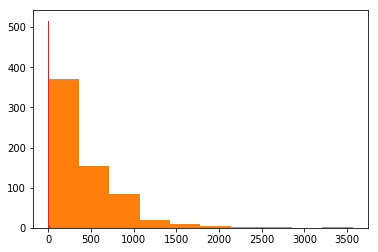

In [283]:
#Making Histograms#

%pylab inline

import matplotlib.pyplot as plt
import numpy as np

# Summarize the given data
def describe_data1(data):
    print ('Mean:', np.mean(data))
    print ('Standard deviation:', np.std(data))
    print ('Minimum:', np.min(data))
    print ('Maximum:', np.max(data))
    plt.hist(data)

print('non-passing students:')
non_passing_minutes = sum_grouped_items(non_passing_engagement_by_account,'total_minutes_visited')
describe_data1(list(non_passing_minutes.values()))

print('passing students:')
passing_minutes = sum_grouped_items(passing_engagement_by_account,'total_minutes_visited')
describe_data1(list(passing_minutes.values()))

print('non-passing students:')
non_passing_lessons = sum_grouped_items(non_passing_engagement_by_account,'lessons_completed')
describe_data1(list(non_passing_lessons.values()))

print('passing students:')
passing_lessons = sum_grouped_items(passing_engagement_by_account,'lessons_completed')
describe_data1(list(passing_lessons.values()))

print('non-passing students:')
non_passing_visits = sum_grouped_items(non_passing_engagement_by_account, 'has_visited')
describe_data1(list(non_passing_visits.values()))

print('passing students:')
passing_visits = sum_grouped_items(passing_engagement_by_account,'has_visited')
describe_data1(list(passing_visits.values()))

Text(0.5,1,'Distribution of classroom visits in the first week for students who pass the subway project')

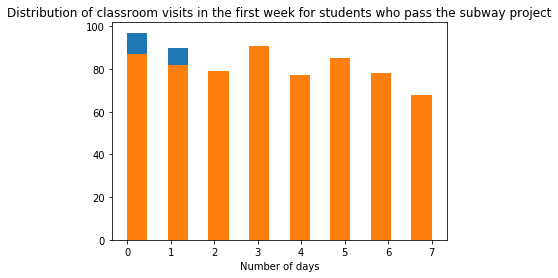

In [284]:
import seaborn as sns

plt.hist(non_passing_visits.values(), bins=15)
plt.xlabel('Number of days')
plt.title('Distribution of classroom visits in the first week ' + 
          'for students who do not pass the subway project')

plt.hist(passing_visits.values(), bins=15)
plt.xlabel('Number of days')
plt.title('Distribution of classroom visits in the first week ' + 
          'for students who pass the subway project')